<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [178]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2023-05-23 06:34:55--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite’

m4_survey_data.sqli 100%[===================>]  34.98M  28.0MB/s    in 1.2s    

2023-05-23 06:34:58 (28.0 MB/s) - ‘m4_survey_data.sqlite’ saved [36679680/36679680]



Connect to the database.


In [179]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [180]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

## Demo: How to run an sql query


In [181]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [182]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [183]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [184]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

In [185]:
QUERY = """
SELECT *
FROM DevType
"""

df = pd.read_sql_query(QUERY,conn)
group = df.groupby('DevType',as_index=False).count().sort_values(by='Respondent')
group

,DevType,Respondent
18,Marketing or sales professional,61
21,Senior executive/VP,160
20,Scientist,354
17,Engineering manager,386
16,"Engineer, site reliability",449
12,"Developer, game or graphics",472
19,Product manager,480
14,Educator,514
0,Academic researcher,556
22,Student,766


# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


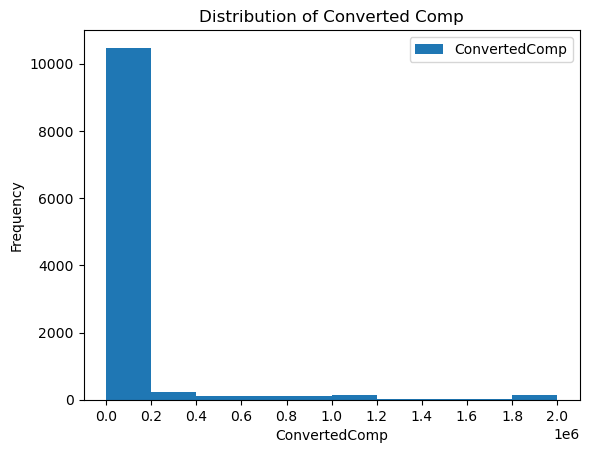

In [186]:
# your code goes here
QUERY = """
SELECT ConvertedComp
FROM master
"""
df1 = pd.read_sql_query(QUERY,conn)
avg_comp = int(df1["ConvertedComp"].mean())
df1["ConvertedComp"].replace(np.nan, avg_comp, inplace=True)

count, bin_edges = np.histogram(df1['ConvertedComp'])
df1.plot(kind='hist', xticks=bin_edges)
plt.xlabel('ConvertedComp')
plt.title('Distribution of Converted Comp')
plt.show()

### Box Plots


Plot a box plot of `Age.`


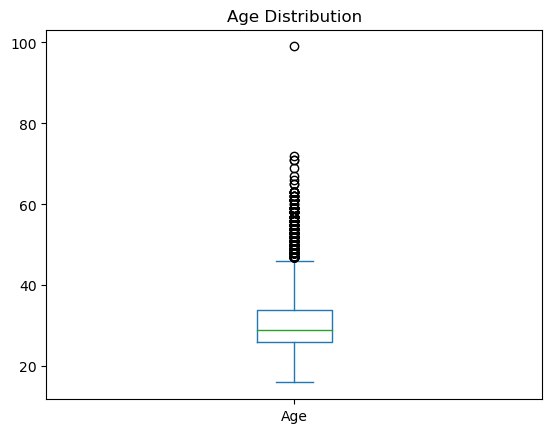

In [187]:
# your code goes here
QUERY = """
SELECT Age
FROM master
"""
df2 = pd.read_sql_query(QUERY,conn)
avg_age = int(df2["Age"].mean())
df2["Age"].replace(np.nan, avg_age, inplace=True)

df2.plot(kind='box')
plt.title('Age Distribution')
plt.show()

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


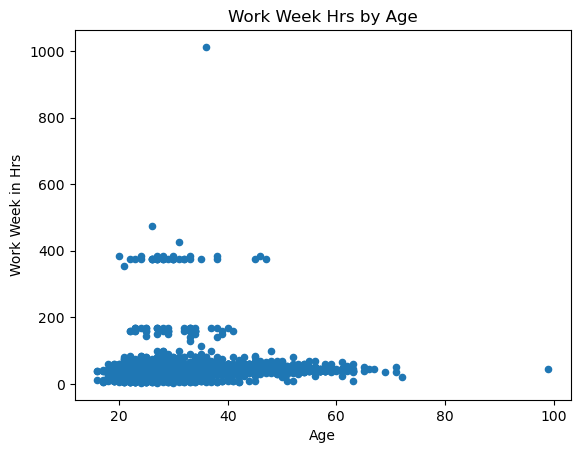

In [188]:
# your code goes here
QUERY = """
SELECT Age,WorkWeekHrs
FROM master
"""
df3 = pd.read_sql_query(QUERY,conn)
df3.plot(kind='scatter', x='Age', y='WorkWeekHrs')
plt.xlabel('Age')
plt.ylabel('Work Week in Hrs')
plt.title('Work Week Hrs by Age')
plt.show()

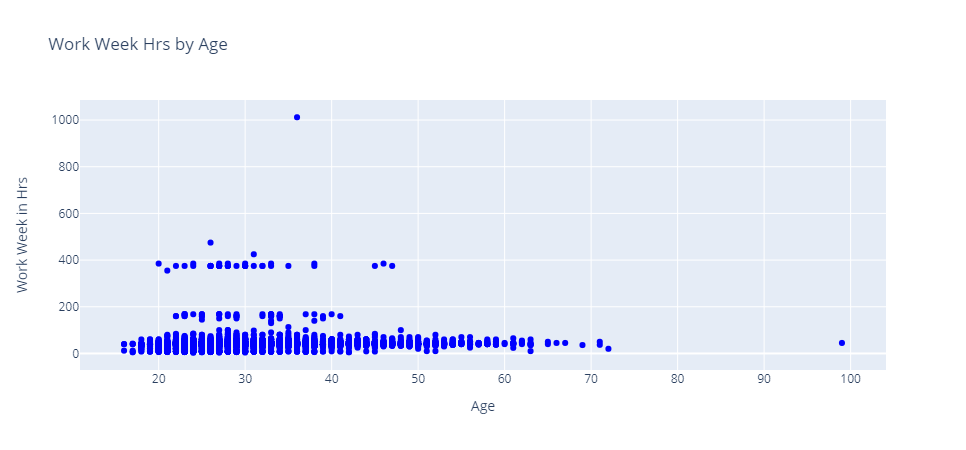

In [189]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=df3['Age'], y=df3['WorkWeekHrs'], mode='markers', marker=dict(color='blue')))
fig.update_layout(title='Work Week Hrs by Age', xaxis_title='Age', yaxis_title='Work Week in Hrs')
fig.show()

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


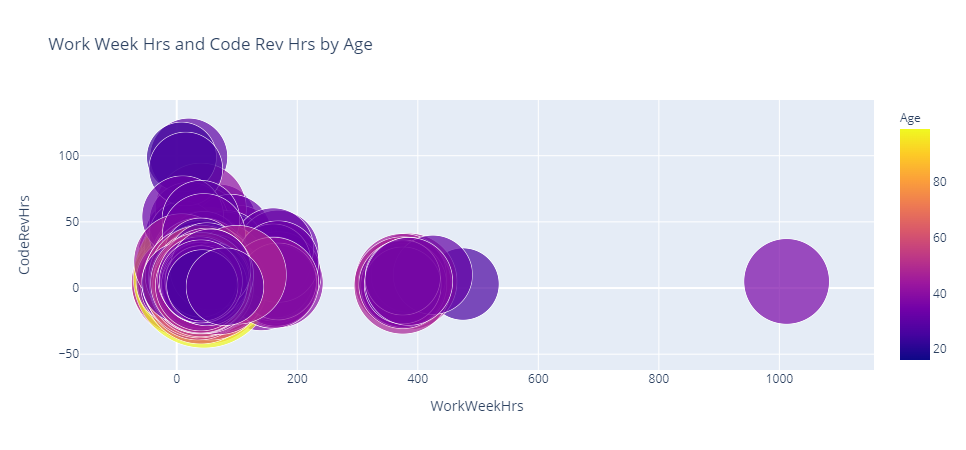

In [190]:
# your code goes here
QUERY = """
SELECT WorkWeekHrs, CodeRevHrs, Age 
FROM master
"""
df4 = pd.read_sql_query(QUERY,conn)
avg_age = int(df4["Age"].mean())
df4["Age"].replace(np.nan, avg_age, inplace=True)

fig = px.scatter(df4, x="WorkWeekHrs", y= "CodeRevHrs", size="Age", color="Age", hover_name="WorkWeekHrs", size_max=100, title = "Work Week Hrs and Code Rev Hrs by Age")
fig.show()

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


  DatabaseDesireNextYear  Respondent
0             PostgreSQL        4328
1                MongoDB        3649
2                  Redis        3331
3                  MySQL        3281
4          Elasticsearch        2856


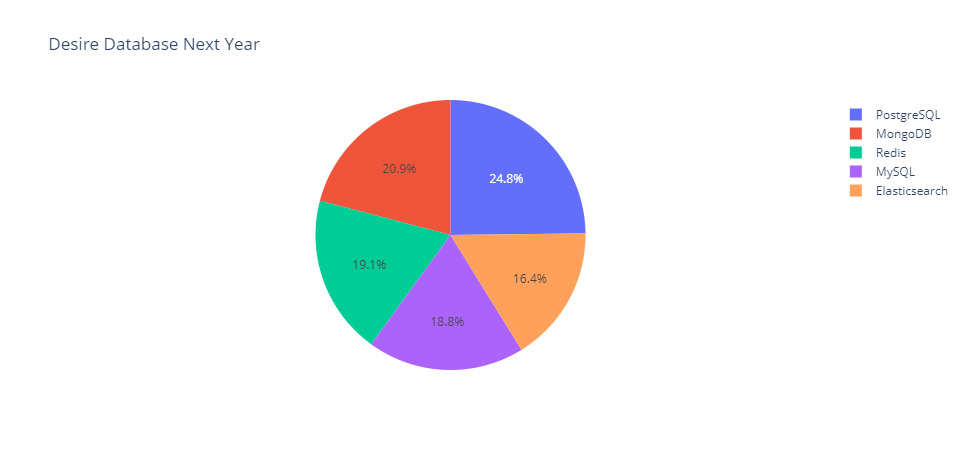

In [191]:
# your code goes here
QUERY = """
SELECT *
FROM DatabaseDesireNextYear
"""
df5 = pd.read_sql_query(QUERY,conn)
group = df5.groupby('DatabaseDesireNextYear',as_index=False).count().sort_values(by=['Respondent'], ignore_index=True, ascending=False).head()
print(group)
fig = px.pie(group, values='Respondent', names='DatabaseDesireNextYear', title='Desire Database Next Year')
fig.show()

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


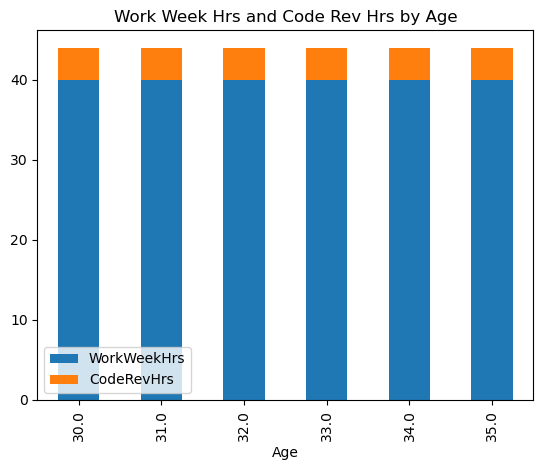

In [192]:
# your code goes here
QUERY = """
SELECT WorkWeekHrs, CodeRevHrs, Age
FROM master
"""
df6 = pd.read_sql_query(QUERY,conn)
group = df6.groupby('Age', as_index=False).median()[14:20]
group.plot(x='Age', kind='bar', stacked=True, title='Work Week Hrs and Code Rev Hrs by Age')
plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


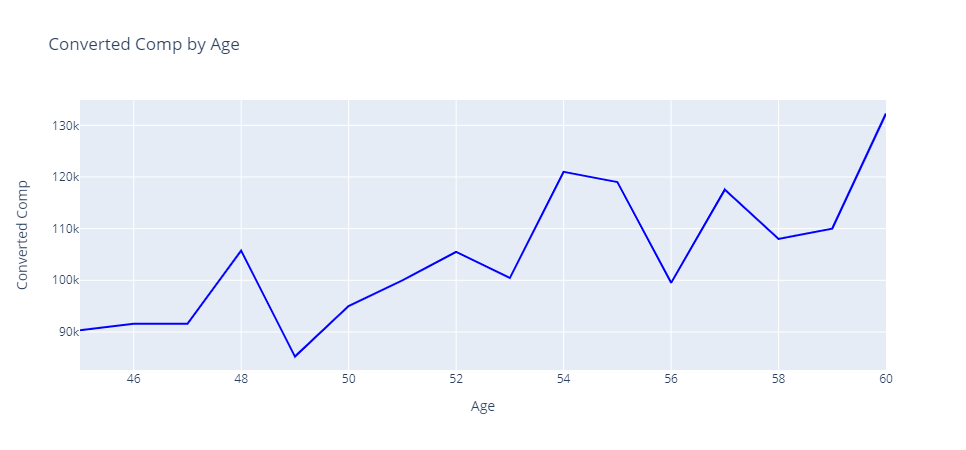

In [193]:
# your code goes here
QUERY = """
SELECT ConvertedComp, Age
FROM master
"""
df7 = pd.read_sql_query(QUERY,conn)
group = df7.groupby('Age', as_index=False).median()[29:45]
fig=go.Figure()
fig.add_trace(go.Scatter(x=group['Age'], y=group['ConvertedComp'], mode='lines', marker=dict(color='blue')))
fig.update_layout(title='Converted Comp by Age', xaxis_title='Age', yaxis_title='Converted Comp')
fig.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


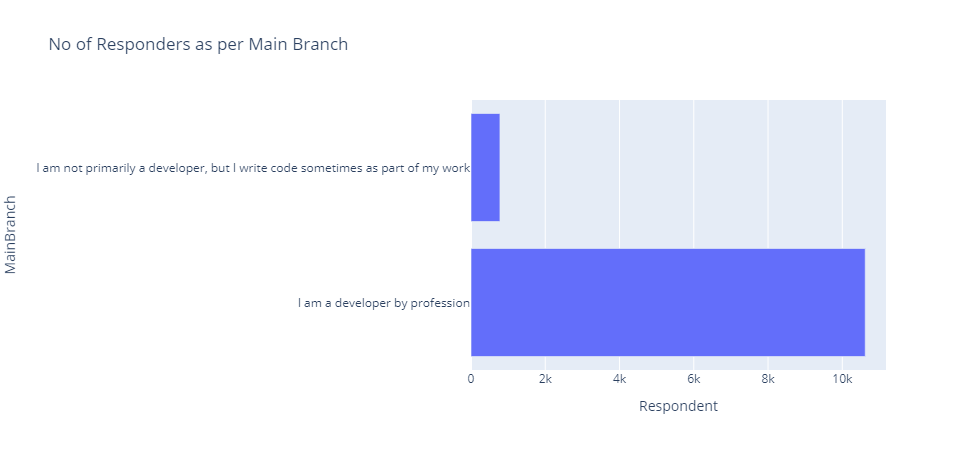

In [194]:
# your code goes here
QUERY = """
SELECT Respondent, MainBranch
FROM master
"""
df8 = pd.read_sql_query(QUERY,conn)
group = df8.groupby('MainBranch',as_index=False).count()
fig = px.bar(group, x='Respondent', y='MainBranch', title='No of Responders as per Main Branch') 
fig.show()

Close the database connection.


In [195]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
